# **Insight 1: Show_type TOP 1**

Una inversion en contenido puede significar una ganancia o una perdida para una plataforma que ofrezca estos servicios.
Naturalmente, antes de tomar una decision es conveniente eliminar o por lo menos reducir incertidumbre sobre algunas variables. 

En el caso de la empresa flow, lo mas prudente es hacer un estudio de mercado para saber que clase de contenidos prometen ganancias, es el caso de este insight, las series y peliculas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ruta_train = "/content/drive/MyDrive/datathon_2021_sr/train.csv"
ruta_metadata = "/content/drive/MyDrive/datathon_2021_sr/metadata.csv"

In [ ]:
df_train = pd.read_csv(ruta_train)
columnas_necesarias = ["account_id","asset_id","tunein","tuneout"]
df_train.head()

,customer_id,account_id,device_type,asset_id,tunein,tuneout,resume
0,0,90627,STATIONARY,18332.0,2021-02-18 22:52:00.0,2021-02-18 23:35:00.0,0
1,0,90627,STATIONARY,24727.0,2021-03-24 23:17:00.0,2021-03-25 00:01:00.0,0
2,1,3387,STB,895.0,2021-03-15 10:05:00.0,2021-03-15 10:23:00.0,0
3,1,3387,STB,895.0,2021-03-15 10:23:00.0,2021-03-15 11:18:00.0,1
4,1,3387,STB,26062.0,2021-03-16 09:24:00.0,2021-03-16 09:44:00.0,0


In [ ]:
df_train["tuneout"].max()

'2021-04-01 03:46:00.0'

In [ ]:
df_train.sort_values(by=['account_id','asset_id'],ascending=True,inplace=True)
df_train.head()

,customer_id,account_id,device_type,asset_id,tunein,tuneout,resume
3164588,94636,0,CLOUD_CLIENT,6397.0,2021-02-25 21:05:00.0,2021-02-25 21:53:00.0,0
3164585,94636,0,STB,13056.0,2021-01-13 00:12:00.0,2021-01-13 01:17:00.0,1
3164587,94636,0,STB,15900.0,2021-01-18 15:21:00.0,2021-01-18 17:29:00.0,0
3164584,94636,0,STB,29811.0,2021-01-12 21:13:00.0,2021-01-12 22:32:00.0,0
3164586,94636,0,STB,29897.0,2021-01-17 01:45:00.0,2021-01-17 02:01:00.0,1


In [ ]:
df_train.shape

(3657801, 7)

In [ ]:
print(f'Nº de filas: {df_train.shape[0]}')
print(f'Nº de columnas: {df_train.shape[1]}')
columnas = df_train.columns
print('Nombre de las columnas: ')
for col in columnas:
    print(col)

Nº de filas: 3657801
Nº de columnas: 7
Nombre de las columnas: 
customer_id
account_id
device_type
asset_id
tunein
tuneout
resume


In [ ]:
print(df_train.isnull().sum())

customer_id     0
account_id      0
device_type    29
asset_id       22
tunein          0
tuneout         0
resume          0
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


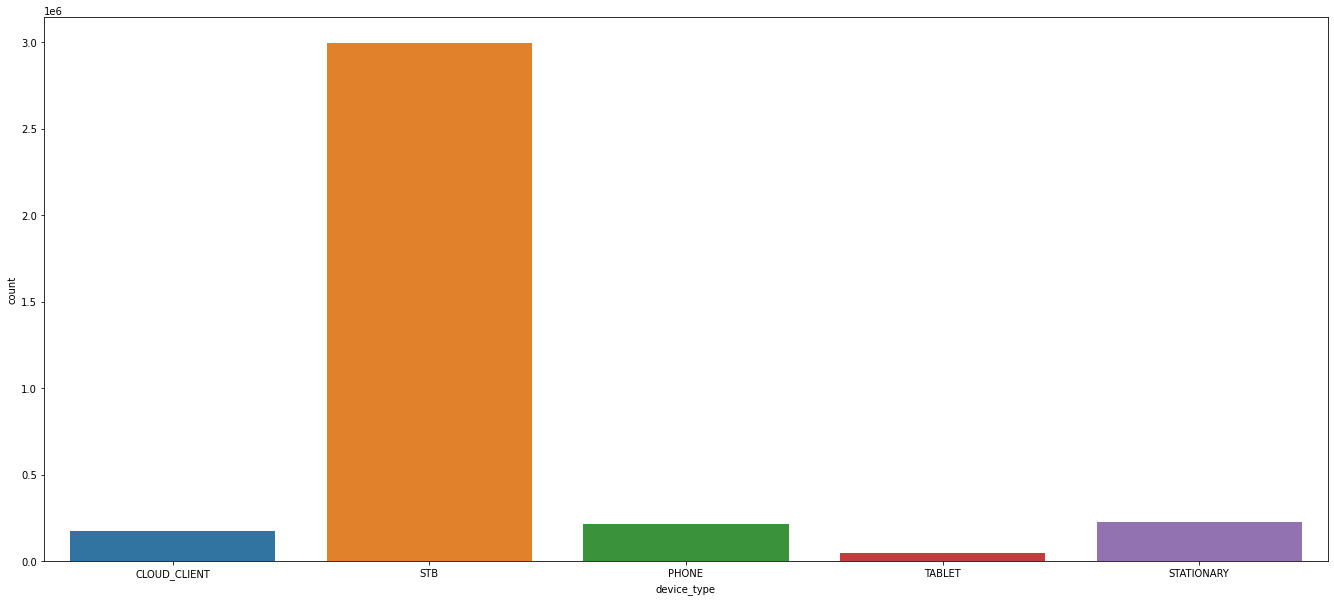

In [ ]:
plt.figure(figsize=(23,10))
sns.countplot(df_train["device_type"])
plt.show()

In [ ]:
def imputar_faltantes_por_moda(dataset, columna):
  moda = dataset[columna].value_counts().index[0]
  dataset[columna] = dataset[columna].fillna(moda)

In [ ]:
imputar_faltantes_por_moda(df_train, "device_type")

In [ ]:
print(df_train.isnull().sum())

customer_id     0
account_id      0
device_type     0
asset_id       22
tunein          0
tuneout         0
resume          0
dtype: int64


In [ ]:
imputar_faltantes_por_moda(df_train, "asset_id")
print(df_train.isnull().sum())

customer_id    0
account_id     0
device_type    0
asset_id       0
tunein         0
tuneout        0
resume         0
dtype: int64


In [ ]:
df_train['tunein_datetime'] = pd.to_datetime(df_train['tunein'], format='%Y-%m-%d %H:%M:%S')
df_train['tunein_datetime'].head()

3164588   2021-02-25 21:05:00
3164585   2021-01-13 00:12:00
3164587   2021-01-18 15:21:00
3164584   2021-01-12 21:13:00
3164586   2021-01-17 01:45:00
Name: tunein_datetime, dtype: datetime64[ns]

In [ ]:
df_train['tuneout_datetime'] = pd.to_datetime(df_train['tuneout'], format='%Y-%m-%d %H:%M:%S')
df_train['tuneout_datetime'].head()

3164588   2021-02-25 21:53:00
3164585   2021-01-13 01:17:00
3164587   2021-01-18 17:29:00
3164584   2021-01-12 22:32:00
3164586   2021-01-17 02:01:00
Name: tuneout_datetime, dtype: datetime64[ns]

In [ ]:
df_train['difftune_datetime'] = df_train['tuneout_datetime'] - df_train['tunein_datetime']
df_train['difftune_datetime'].head()

In [ ]:
def datetime_to_minutes(x):
  return x.total_seconds()/60

In [ ]:
df_train['minutes'] = df_train['difftune_datetime'].apply(datetime_to_minutes)
df_train['minutes'].head()

In [ ]:
df_train = df_train.groupby(['account_id','asset_id'], as_index=False).agg({"minutes": "sum"})
print("Tamaño de df_train: "+str(df_train.shape[0]))

In [ ]:
df_metadata = pd.read_csv(ruta_metadata, sep=';')

26.974734273406344

In [ ]:
def consultar_contents_ids_con_asset_id(asset_id):
  mask = df_metadata["asset_id"] == asset_id
  contents = df_metadata.loc[mask]["content_id"]
  contents = contents.tolist()
  return contents[0]

In [ ]:
df_train["content_id"] = df_train["asset_id"].apply(consultar_contents_ids_con_asset_id)

In [ ]:
df_train_transformado = pd.read_csv("/content/drive/MyDrive/datathon_2021_sr/df_train.csv")
df_train_transformado = df_train_transformado[["account_id","content_id","minutes"]]
df_train_transformado.head()

,account_id,content_id,minutes
0,0,1503.0,128.0
1,0,2866.0,65.0
2,0,3438.0,79.0
3,0,3498.0,16.0
4,0,3845.0,48.0


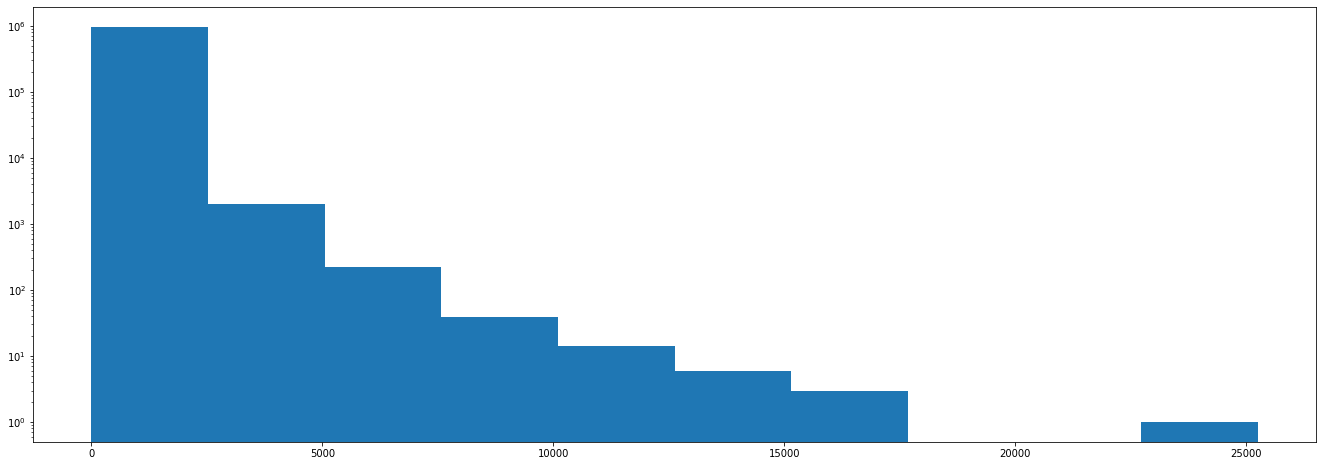

In [ ]:
plt.figure(figsize=(23,8))
plt.hist(df_train_transformado['minutes'],log=True)
plt.show()

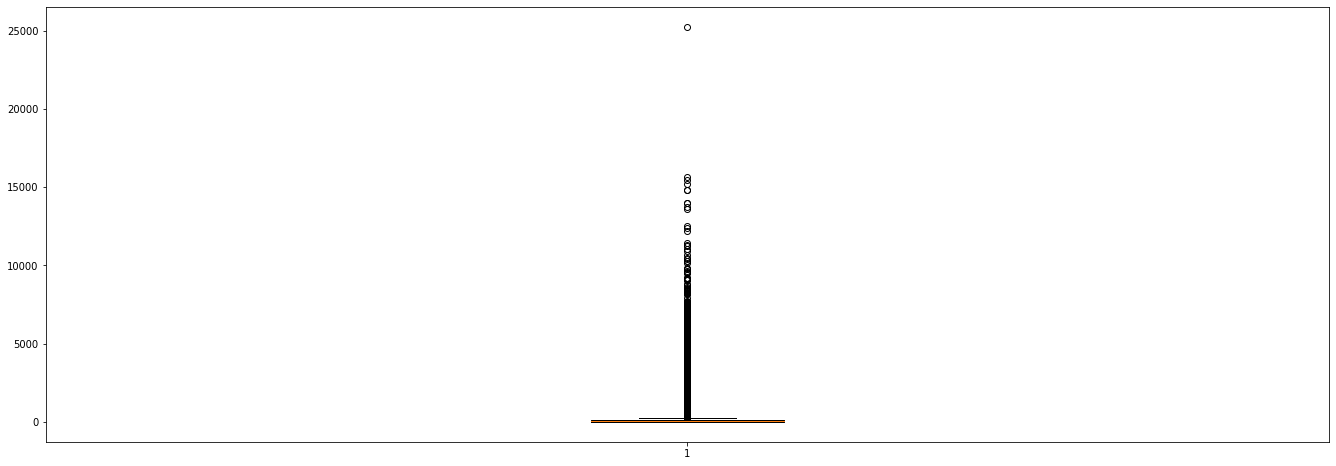

In [ ]:
plt.figure(figsize=(23,8))
plt.boxplot(df_train_transformado['minutes'])
plt.show()

La funcion de abajo se encarga de seccionar una distribucion de valores en 3 partes separadas por 2 umbrales, luego calcula el porcentaje que ocupa cada seccion

In [ ]:
def division_columna_por_2_umbrales(df, columna, umbral1, umbral2):

  a = umbral1;
  b = umbral2;

  shape = df.shape[0]
  min = str(df[columna].min())
  max = str(df[columna].max())

  mask = df[columna] < a
  cluster_1 = sum(mask)
  cluster_1_porcentaje = round((cluster_1/shape)*100,5)

  mask1 = df[columna] >= a
  mask2 = df[columna] <= b
  mask = mask1 & mask2
  cluster_2 = sum(mask)
  cluster_2_porcentaje = round((cluster_2/shape)*100,5)

  mask = df[columna] > b
  cluster_3 = sum(mask)
  cluster_3_porcentaje = round((cluster_3/shape)*100,5)

  a = str(a)
  b = str(b)

  print("Seccion 1: ")
  print(min+" - "+a+" min : "+str(cluster_1))
  print("Porcentaje: "+str(cluster_1_porcentaje)+" %")
  print("")
  print("Seccion 2: ")
  print(a+" - "+b+" min : "+str(cluster_2))
  print("Porcentaje: "+str(cluster_2_porcentaje)+" %")
  print("")
  print("Seccion 3: ")
  print(b+" - "+max+" min : "+str(cluster_3))
  print("Porcentaje: "+str(cluster_3_porcentaje)+" %")

Las visualizaciones se concentran entre 2 y 5000 minutos

In [ ]:
division_columna_por_2_umbrales(df_train_transformado, 'minutes', 5000, 15000)

Seccion 1: 
2.0 - 5000 min : 971290
Porcentaje: 99.96964 %

Seccion 2: 
5000 - 15000 min : 291
Porcentaje: 0.02995 %

Seccion 3: 
15000 - 25252.0 min : 4
Porcentaje: 0.00041 %


Tambien se puede dividir en una distribucion normal donde hay un conjunto promedio que ocupa el 70% (0-90min), otro conjunto mas distanciado que ocupa el 25% (90-350min) y por ultimo los valores atipicos 5% (mas de 350min).

Por lo general, una pelicula dura 90 min y un contenido de una serie dura menos de 90 min, por lo tanto, este conjunto puede contener series y peliculas indistintamente de las proporciones que ocupa cada tipo

In [ ]:
division_columna_por_2_umbrales(df_train_transformado, 'minutes', 90, 350)

Seccion 1: 
2.0 - 90 min : 680154
Porcentaje: 70.00458 %

Seccion 2: 
90 - 350 min : 244238
Porcentaje: 25.1381 %

Seccion 3: 
350 - 25252.0 min : 47193
Porcentaje: 4.85732 %


In [ ]:
df_0_90_min = df_train_transformado[df_train_transformado["minutes"] <= 90].copy()
list_content_ids = df_0_90_min["content_id"].unique()
list_content_ids = list_content_ids.tolist()

In [ ]:
df_metadata = pd.read_csv(ruta_metadata, sep=';')
df_metadata_filtrado_0_90_min = df_metadata[df_metadata["content_id"].isin(list_content_ids)]
columnas_necesarias = ["content_id","show_type","audience","country_of_origin","category"]
df_metadata_filtrado_0_90_min = df_metadata_filtrado_0_90_min[columnas_necesarias]

,content_id,show_type,audience,country_of_origin,category
0,0.0,Serie,General,AR,Drama
1,1.0,Película,General,PY,Suspenso/Acción
3,3.0,Película,General,CL,Drama
6,6.0,Serie,Juvenil,GB,Aventura/Fantasía
7,7.0,TV,General,AR,Interés General/Espectáculo


In [ ]:
conjunto_cols = {}
conjunto_cols["show_type"] = pd.Series.mode
conjunto_cols["audience"] = pd.Series.mode
conjunto_cols["country_of_origin"] = pd.Series.mode
conjunto_cols["category"] = pd.Series.mode
df_metadata_filtrado_0_90_min = df_metadata_filtrado_0_90_min.groupby(['content_id'], as_index=False).agg(conjunto_cols)

In [ ]:
df_metadata_filtrado_0_90_min["show_type"] = df_metadata_filtrado_0_90_min["show_type"].astype(str)
df_metadata_filtrado_0_90_min["audience"] = df_metadata_filtrado_0_90_min["audience"].astype(str)
df_metadata_filtrado_0_90_min["country_of_origin"] = df_metadata_filtrado_0_90_min["country_of_origin"].astype(str)
df_metadata_filtrado_0_90_min["category"] = df_metadata_filtrado_0_90_min["category"].astype(str)

La gran mayoria de visualizaciones entre 0 y 90 min corresponden a peliculas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


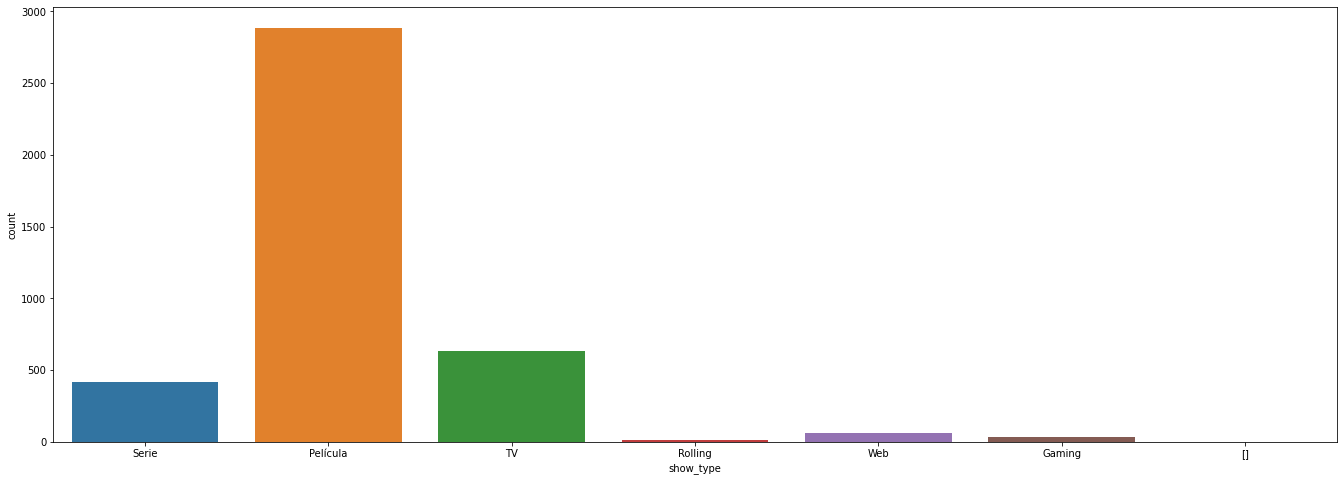

Moda de categoria: Drama


In [ ]:
plt.figure(figsize=(23,8))
sns.countplot(df_metadata_filtrado_0_90_min["show_type"])
plt.show()

print("Moda de categoria: "+df_metadata_filtrado_0_90_min["category"].mode()[0])

Ahora voy a probar con el filtro de 90-350 min, donde, deberian aparecer mas series que peliculas porque una pelicula por lo general no dura mas de 2 horas

In [ ]:
mask1 = df_train_transformado["minutes"] > 90
mask2 = df_train_transformado["minutes"] <= 350
mask = mask1 & mask2
df_90_350_min = df_train_transformado[mask].copy()
list_content_ids_2 = df_90_350_min["content_id"].unique()
list_content_ids_2 = list_content_ids_2.tolist()

In [ ]:
df_metadata = pd.read_csv(ruta_metadata, sep=';')
df_metadata_filtrado_90_350_min = df_metadata[df_metadata["content_id"].isin(list_content_ids_2)]
columnas_necesarias = ["content_id","show_type","audience","country_of_origin","category"]
df_metadata_filtrado_90_350_min = df_metadata_filtrado_90_350_min[columnas_necesarias]

In [ ]:
conjunto_cols = {}
conjunto_cols["show_type"] = pd.Series.mode
conjunto_cols["audience"] = pd.Series.mode
conjunto_cols["country_of_origin"] = pd.Series.mode
conjunto_cols["category"] = pd.Series.mode
df_metadata_filtrado_90_350_min = df_metadata_filtrado_90_350_min.groupby(['content_id'], as_index=False).agg(conjunto_cols)

In [ ]:
df_metadata_filtrado_90_350_min.shape

(3702, 5)

In [ ]:
df_metadata_filtrado_90_350_min["show_type"] = df_metadata_filtrado_90_350_min["show_type"].astype(str)
df_metadata_filtrado_90_350_min["audience"] = df_metadata_filtrado_90_350_min["audience"].astype(str)
df_metadata_filtrado_90_350_min["country_of_origin"] = df_metadata_filtrado_90_350_min["country_of_origin"].astype(str)
df_metadata_filtrado_90_350_min["category"] = df_metadata_filtrado_90_350_min["category"].astype(str)

Las peliculas siguen abarcando las visualizaciones a pesar de la diferencia temporal, se volvio un patron y puede deberse a algunas cuestiones:

* Los clientes prefieren contenido para ver 1 sola vez sin preocuparse por mantenerse al tanto del contenido 
* La publicidad se enfoca en ver peliculas pero no habla sobre las series

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


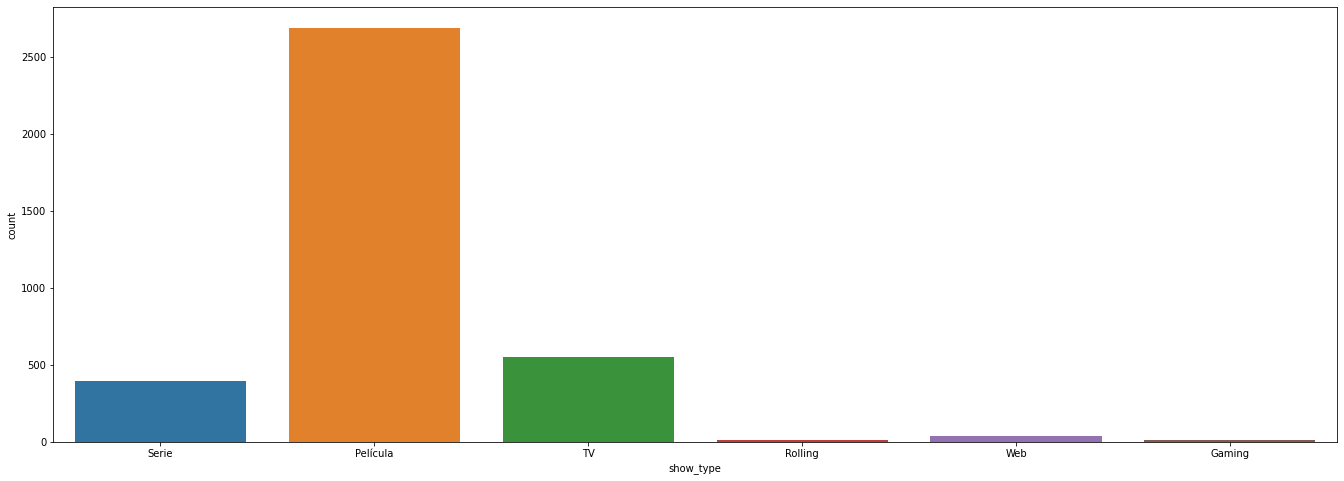

Moda de categoria: Drama


In [ ]:
plt.figure(figsize=(23,8))
sns.countplot(df_metadata_filtrado_90_350_min["show_type"])
plt.show()

print("Moda de categoria: "+df_metadata_filtrado_90_350_min["category"].mode()[0])

**Conclusion: **

Las peliculas son las que generan mas visualizaciones

# **Agrupamiento / Clustering de contenidos**

Los sistemas de recomendación (SR) se utilizan ampliamente para proporcionar sugerencias automáticas personalizadas de información, productos y servicios. El filtrado colaborativo (FC) es una de las técnicas de recomendación más populares. Sin embargo, con el rápido crecimiento de la Web en términos de usuarios y elementos, la mayoría de los RS que utilizan la técnica FC sufren problemas como la escasez de datos y la escalabilidad. En este insight voy a prsentar un SR basado en técnicas de agrupación de datos para abordar el problema de escalabilidad asociado a la tarea de recomendación.

El trabajo propuesto utiliza el algoritmo de agrupación KMeans para agrupar a los contenidos, y luego implementar algoritmos de votación para recomendar elementos al usuario según el/los clúster/es al que pertenece/n su historial de visualizacion. 

El objetivo es mejorar el tiempo de ejecución así como mantener una calidad de recomendación aceptable.

**Importacion de herramientas**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

**Cargando el metadata**

In [ ]:
df_metadata = pd.read_csv(ruta_metadata, sep=';')
df_metadata.head()

,asset_id,content_id,title,reduced_title,episode_title,show_type,released_year,country_of_origin,category,keywords,description,reduced_desc,cast_first_name,credits_first_name,run_time_min,audience,made_for_tv,close_caption,sex_rating,violence_rating,language_rating,dialog_rating,fv_rating,pay_per_view,pack_premium_1,pack_premium_2,create_date,modify_date,start_vod_date,end_vod_date
0,15188,0.0,Ep:17 Tiempos Compulsivos,Tiempos_Compul_E17,Episodio 17,Serie,2012.0,AR,Drama,"Trastornos,Médicos,Tragicómica,Telenovela,Enfe...",Esteban recibe una noticia inesperada: va a se...,Esteban recibe una noticia inesperada: va a se...,"Rodrigo De la Serna, Paola Krum, Fernán Mirás,...",Daniel Barone,48.0,General,N,N,N,N,N,N,N,N,N,N,2017-12-01T10:18:15.0Z,2019-01-26T06:37:18.0Z,2017-12-01T00:00:00.0Z,2020-12-01T23:59:59.0Z
1,24940,1.0,7 Cajas,7_Cajas,NaN,Película,2012.0,PY,Suspenso/Acción,"Latinoamérica,Pobreza,Crimen,Pandillas",Víctor trabaja como carretillero. Un día recib...,"Trabajando como carretillero, Víctor recibe un...","Celso Franco, Víctor Sosa, Lali Gonzalez",Juan Carlos Maneglia,105.0,General,N,N,N,N,N,N,N,Y,N,N,2017-12-19T20:58:15.0Z,2019-09-17T19:02:03.0Z,2017-12-15T00:00:00.0Z,2022-12-14T23:59:59.0Z
2,21939,2.0,La Maldición de las Hormigas Gigantes,La_Maldicion_de_las,NaN,Película,2016.0,FI,Terror/Comedia,"Criaturas,Plagas,Adolescentes,Fantasía,Video J...",Un grupo de motociclistas busca diversión el d...,Un grupo de motociclistas descubre un laborato...,"Mark Arnold, Harry Lister Smith, Vanessa Grass...",Marko Mäkilaakso,82.0,Juvenil,Y,N,N,N,N,N,N,N,N,N,2018-02-16T13:51:07.0Z,2020-04-28T14:16:38.0Z,2018-01-25T00:00:00.0Z,2020-12-01T23:59:59.0Z
3,9005,3.0,Una Mujer Fantástica,Una_Mujer_Fantastic,NaN,Película,2017.0,CL,Drama,"LGBT,Mujeres,Latinoamérica",Marina y Orlando están enamorados y planean un...,Marina y Orlando están enamorados. Pero cuando...,"Daniela Vega, Francisco Reyes, Luis Gnecco, Am...",Sebastián Lelio,99.0,General,N,N,N,N,N,N,N,N,Y,N,2018-05-26T11:58:44.0Z,2019-11-15T03:00:23.0Z,2018-05-27T00:00:00.0Z,2021-04-30T23:59:59.0Z
4,7391,4.0,Star Trek,Star_Trek,NaN,Película,2009.0,US,Ciencia Ficción/Aventura,"Fantasía,Galaxia,Futurismo,Aliens,Criaturas",El descarado James T. Kirk trata de estar a la...,James T. Kirk trata de estar a la altura del l...,"Chris Pine, Zachary Quinto, Leonard Nimoy, Eri...",J.J. Abrams,126.0,General,N,N,N,N,N,N,N,Y,N,N,2019-05-03T20:07:24.0Z,2020-04-09T04:37:29.0Z,2019-05-02T00:00:00.0Z,2020-12-31T23:59:59.0Z


**Valores faltantes**


In [ ]:
df_metadata.isnull().sum()

asset_id                  0
content_id               21
title                     0
reduced_title             0
episode_title          4147
show_type                 4
released_year             0
country_of_origin         4
category                  0
keywords                  2
description               2
reduced_desc              0
cast_first_name        8732
credits_first_name    12554
run_time_min              0
audience                  1
made_for_tv               0
close_caption             0
sex_rating                0
violence_rating           0
language_rating           0
dialog_rating             0
fv_rating                 0
pay_per_view              0
pack_premium_1            0
pack_premium_2            0
create_date               0
modify_date               0
start_vod_date            0
end_vod_date              0
dtype: int64

A continuacion voy a eliminar las columnas que no aportan informacion relevante

In [ ]:
df_metadata.drop(columns=["episode_title", "description", "cast_first_name", "credits_first_name"], inplace=True)

In [ ]:
def imputar_faltantes_por_moda(dataset, columna):
  moda = dataset[columna].value_counts().index[0]
  dataset[columna] = dataset[columna].fillna(moda)

Limpieza de datos faltantes

In [ ]:
imputar_faltantes_por_moda(df_metadata,"content_id")
imputar_faltantes_por_moda(df_metadata,"show_type")
imputar_faltantes_por_moda(df_metadata,"country_of_origin")
imputar_faltantes_por_moda(df_metadata,"audience")
df_metadata["keywords"].fillna('', inplace=True)

In [ ]:
df_metadata.isnull().sum()

asset_id             0
content_id           0
title                0
reduced_title        0
show_type            0
released_year        0
country_of_origin    0
category             0
keywords             0
reduced_desc         0
run_time_min         0
audience             0
made_for_tv          0
close_caption        0
sex_rating           0
violence_rating      0
language_rating      0
dialog_rating        0
fv_rating            0
pay_per_view         0
pack_premium_1       0
pack_premium_2       0
create_date          0
modify_date          0
start_vod_date       0
end_vod_date         0
dtype: int64

Estas son las columnas relevantes para hacer el agrupamiento

In [ ]:
df_metadata[["show_type", "category", "audience"]].head()

,show_type,category,audience
0,Serie,Drama,General
1,Película,Suspenso/Acción,General
2,Película,Terror/Comedia,Juvenil
3,Película,Drama,General
4,Película,Ciencia Ficción/Aventura,General


Primero codifico la columna "show_type" en columnas binarias porque no hay ninguna jerarquia entre ellas

In [ ]:
df_show_type = df_metadata["show_type"].copy()
df_show_type = pd.DataFrame(df_show_type, columns=["show_type"])
df_show_type = pd.get_dummies(df_metadata["show_type"], prefix='show_type_')
df_show_type.head()

,show_type__Gaming,show_type__Película,show_type__Rolling,show_type__Serie,"show_type__Series,Serie",show_type__TV,show_type__Tutorial,show_type__Web
0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


Primero codifico la columna "audience" en columnas binarias porque no hay ninguna jerarquia entre ellas

In [ ]:
df_audience = df_metadata["audience"].copy()
df_audience = pd.DataFrame(df_audience, columns=["audience"])
df_audience = pd.get_dummies(df_metadata["audience"], prefix='aud_')
df_audience.head()

,aud__Familiar,aud__Gaming,aud__General,aud__Hombres,aud__Juvenil,aud__Mujeres,aud__NIños,aud__Niños,aud__Preescolar,aud__Teens
0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


La columna categorias es un caso particular, un contenido puede tener multiples categorias (separadas por un "/"), entonces necesito una cabecera con todas las categorias posibles

In [ ]:
categories = set()

In [ ]:
df_metadata['category'].apply(lambda item: [categories.add('cat_'+x) for x in str(item).split('/')])

0              [None]
1        [None, None]
2        [None, None]
3              [None]
4        [None, None]
             ...     
33139    [None, None]
33140    [None, None]
33141    [None, None]
33142    [None, None]
33143    [None, None]
Name: category, Length: 33144, dtype: object

Hay 52 categorias en total

In [ ]:
categories = {x for x in categories if pd.notna(x) or x != ''}
categories.discard('cat_')
categories.discard('nan')
len(categories)

52

Esta es la cabecera

In [ ]:
categories_df = pd.DataFrame(columns=categories)
categories_df.head()

,cat_Acción,cat_Ciencia ficción,cat_Espectáculo,cat_Música,cat_Deporte,cat_Magazine,cat_Naturaleza,cat_Fantasía,cat_Musical,cat_Historia,cat_Moda,cat_Viajes,cat_Comedia,cat_Aventura,cat_Bélico,cat_Reality,cat_Cultura,cat_Teatro,cat_Drama,cat_Político,cat_Dibujos animados,cat_Documental,cat_Crimen,cat_Dibujos Animados,cat_Investigación,cat_Entretenimiento,cat_Romance,cat_Policial,"cat_Infantil, Comedia",cat_Familia,cat_Infantil,cat_Animales,cat_Aventuras,cat_Western,cat_Familiar,cat_Ciencia,cat_Competencia,cat_Accion,cat_Biografía,cat_Religión,cat_Interés General,cat_Animación,cat_Ciencia Ficción,cat_Restauración,cat_Terror,cat_Suspenso,cat_Entrevistas,cat_Decodificador Flow,cat_Humor,cat_Cocina,cat_Tutoriales,cat_Periodístico


Ahora, voy a recorrer el dataset de metada y a partir de la/s categoria/s del contenido puntual, voy a rellenar la cabecera de categorias con 0s y 1s (el 1 significa que el contenido contiene la categoria)

In [ ]:
cates  = df_metadata['category']
col_names = categories_df.columns
cat_features = []
for i,cat in enumerate(cates): 
    if pd.notna(cat):
        feats = cat.split('/')                         
        row = np.zeros(len(categories))
        for feat in feats:
            feat = 'cat_'+feat
            if feat != '':
                if feat in col_names:
                  index = np.where(col_names == feat)[0][0] #index            
                  row[index] = 1
        cat_features.append(row)

In [ ]:
categories_df = pd.DataFrame(cat_features,columns= categories)
categories_df.head()

,cat_Acción,cat_Ciencia ficción,cat_Espectáculo,cat_Música,cat_Deporte,cat_Magazine,cat_Naturaleza,cat_Fantasía,cat_Musical,cat_Historia,cat_Moda,cat_Viajes,cat_Comedia,cat_Aventura,cat_Bélico,cat_Reality,cat_Cultura,cat_Teatro,cat_Drama,cat_Político,cat_Dibujos animados,cat_Documental,cat_Crimen,cat_Dibujos Animados,cat_Investigación,cat_Entretenimiento,cat_Romance,cat_Policial,"cat_Infantil, Comedia",cat_Familia,cat_Infantil,cat_Animales,cat_Aventuras,cat_Western,cat_Familiar,cat_Ciencia,cat_Competencia,cat_Accion,cat_Biografía,cat_Religión,cat_Interés General,cat_Animación,cat_Ciencia Ficción,cat_Restauración,cat_Terror,cat_Suspenso,cat_Entrevistas,cat_Decodificador Flow,cat_Humor,cat_Cocina,cat_Tutoriales,cat_Periodístico
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_complete = pd.concat([df_show_type,df_audience,categories_df], axis=1)
df_complete.head()

,show_type__Gaming,show_type__Película,show_type__Rolling,show_type__Serie,"show_type__Series,Serie",show_type__TV,show_type__Tutorial,show_type__Web,aud__Familiar,aud__Gaming,aud__General,aud__Hombres,aud__Juvenil,aud__Mujeres,aud__NIños,aud__Niños,aud__Preescolar,aud__Teens,cat_Acción,cat_Ciencia ficción,cat_Espectáculo,cat_Música,cat_Deporte,cat_Magazine,cat_Naturaleza,cat_Fantasía,cat_Musical,cat_Historia,cat_Moda,cat_Viajes,cat_Comedia,cat_Aventura,cat_Bélico,cat_Reality,cat_Cultura,cat_Teatro,cat_Drama,cat_Político,cat_Dibujos animados,cat_Documental,cat_Crimen,cat_Dibujos Animados,cat_Investigación,cat_Entretenimiento,cat_Romance,cat_Policial,"cat_Infantil, Comedia",cat_Familia,cat_Infantil,cat_Animales,cat_Aventuras,cat_Western,cat_Familiar,cat_Ciencia,cat_Competencia,cat_Accion,cat_Biografía,cat_Religión,cat_Interés General,cat_Animación,cat_Ciencia Ficción,cat_Restauración,cat_Terror,cat_Suspenso,cat_Entrevistas,cat_Decodificador Flow,cat_Humor,cat_Cocina,cat_Tutoriales,cat_Periodístico
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Agrego la columna de content_ids

In [ ]:
df_complete["content_id"] = df_metadata["content_id"].values
df_complete.head()

,show_type__Gaming,show_type__Película,show_type__Rolling,show_type__Serie,"show_type__Series,Serie",show_type__TV,show_type__Tutorial,show_type__Web,aud__Familiar,aud__Gaming,aud__General,aud__Hombres,aud__Juvenil,aud__Mujeres,aud__NIños,aud__Niños,aud__Preescolar,aud__Teens,cat_Acción,cat_Ciencia ficción,cat_Espectáculo,cat_Música,cat_Deporte,cat_Magazine,cat_Naturaleza,cat_Fantasía,cat_Musical,cat_Historia,cat_Moda,cat_Viajes,cat_Comedia,cat_Aventura,cat_Bélico,cat_Reality,cat_Cultura,cat_Teatro,cat_Drama,cat_Político,cat_Dibujos animados,cat_Documental,cat_Crimen,cat_Dibujos Animados,cat_Investigación,cat_Entretenimiento,cat_Romance,cat_Policial,"cat_Infantil, Comedia",cat_Familia,cat_Infantil,cat_Animales,cat_Aventuras,cat_Western,cat_Familiar,cat_Ciencia,cat_Competencia,cat_Accion,cat_Biografía,cat_Religión,cat_Interés General,cat_Animación,cat_Ciencia Ficción,cat_Restauración,cat_Terror,cat_Suspenso,cat_Entrevistas,cat_Decodificador Flow,cat_Humor,cat_Cocina,cat_Tutoriales,cat_Periodístico,content_id
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


Hay un problema,...originalmente el dataset de metada contenia las asociaciones de asset_id con content_id, y por eso, la columna "content_id" contiene valores repetidos.
Propongo agrupar el dataset por content_id y sumar las demas columnas, despues de sumar, establecer un valor maximo para las columnas de atributos (que es el 1) para que el agrupamiento sea lo mas objetivo posible.


In [ ]:
cols_a_sumar = df_complete.drop(columns=['content_id'], inplace=False).columns 

conjunto_cols = {}

for c in cols_a_sumar:
  conjunto_cols[c] = "sum"

In [ ]:
df_complete = df_complete.groupby(['content_id'], as_index=False).agg(conjunto_cols)
df_complete[cols_a_sumar] = df_complete[cols_a_sumar].ge(1).astype(int)
df_complete.rename(index=df_complete["content_id"])
df_complete.drop(columns=["content_id"],inplace=True)
df_complete.head()

,show_type__Gaming,show_type__Película,show_type__Rolling,show_type__Serie,"show_type__Series,Serie",show_type__TV,show_type__Tutorial,show_type__Web,aud__Familiar,aud__Gaming,aud__General,aud__Hombres,aud__Juvenil,aud__Mujeres,aud__NIños,aud__Niños,aud__Preescolar,aud__Teens,cat_Acción,cat_Ciencia ficción,cat_Espectáculo,cat_Música,cat_Deporte,cat_Magazine,cat_Naturaleza,cat_Fantasía,cat_Musical,cat_Historia,cat_Moda,cat_Viajes,cat_Comedia,cat_Aventura,cat_Bélico,cat_Reality,cat_Cultura,cat_Teatro,cat_Drama,cat_Político,cat_Dibujos animados,cat_Documental,cat_Crimen,cat_Dibujos Animados,cat_Investigación,cat_Entretenimiento,cat_Romance,cat_Policial,"cat_Infantil, Comedia",cat_Familia,cat_Infantil,cat_Animales,cat_Aventuras,cat_Western,cat_Familiar,cat_Ciencia,cat_Competencia,cat_Accion,cat_Biografía,cat_Religión,cat_Interés General,cat_Animación,cat_Ciencia Ficción,cat_Restauración,cat_Terror,cat_Suspenso,cat_Entrevistas,cat_Decodificador Flow,cat_Humor,cat_Cocina,cat_Tutoriales,cat_Periodístico
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Ahora el dataset de metada se redujo a 4366 filas, es la cantidad definitiva de contenidos

In [ ]:
df_complete.shape

(4366, 70)

**Problema:**

Los atributos estan codificados en 0s y 1s, kmeans utiliza la distancia euclidiana al cuadrado n m dimensiones como referencia para encontrar la similitud entre 2 puntos

$$
d(x,y)^{2} = \sum_{j=1}^{m} (x_j - y_j)^{2}
$$

donde algunas distancias llevan a la confusion del modelo, ejemplo:

$$
(1-0)^{2} = (0-1)^{2} = 1
$$

Por eso, voy a pondear las columnas de atributos usando constantes ordinales

In [ ]:
pesos_show_type = {}
n = 0
for c in df_show_type.columns:
  n += 1
  pesos_show_type[c] = n


pesos_audience = {}
n = 0
for c in df_audience.columns:
  n += 1
  pesos_audience[c] = n


pesos_category = {}
n = 0
for c in categories_df.columns:
  n += 1
  pesos_category[c] = n



df_complete_ponderado = df_complete.copy()
df_complete_ponderado
for a in pesos_audience:
  df_complete_ponderado[a] = df_complete_ponderado[a]*pesos_audience[a]

for a in pesos_show_type:
  df_complete_ponderado[a] = df_complete_ponderado[a]*pesos_show_type[a]

for a in pesos_category:
  df_complete_ponderado[a] = df_complete_ponderado[a]*pesos_category[a]

df_complete_ponderado.head()

,show_type__Gaming,show_type__Película,show_type__Rolling,show_type__Serie,"show_type__Series,Serie",show_type__TV,show_type__Tutorial,show_type__Web,aud__Familiar,aud__Gaming,aud__General,aud__Hombres,aud__Juvenil,aud__Mujeres,aud__NIños,aud__Niños,aud__Preescolar,aud__Teens,cat_Acción,cat_Ciencia ficción,cat_Espectáculo,cat_Música,cat_Deporte,cat_Magazine,cat_Naturaleza,cat_Fantasía,cat_Musical,cat_Historia,cat_Moda,cat_Viajes,cat_Comedia,cat_Aventura,cat_Bélico,cat_Reality,cat_Cultura,cat_Teatro,cat_Drama,cat_Político,cat_Dibujos animados,cat_Documental,cat_Crimen,cat_Dibujos Animados,cat_Investigación,cat_Entretenimiento,cat_Romance,cat_Policial,"cat_Infantil, Comedia",cat_Familia,cat_Infantil,cat_Animales,cat_Aventuras,cat_Western,cat_Familiar,cat_Ciencia,cat_Competencia,cat_Accion,cat_Biografía,cat_Religión,cat_Interés General,cat_Animación,cat_Ciencia Ficción,cat_Restauración,cat_Terror,cat_Suspenso,cat_Entrevistas,cat_Decodificador Flow,cat_Humor,cat_Cocina,cat_Tutoriales,cat_Periodístico
0,0,0,0,4,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,0,0,0,0,0,0,0
3,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,0,0,0,0,0,0,0,0,0


Ahora voy a hacer un experimento para medir el numero optimo de clusters y despues voy a medir la distancia de los puntos hacia los centroides con la metrica de la silueta, lo ideal es que se aproxime a 1

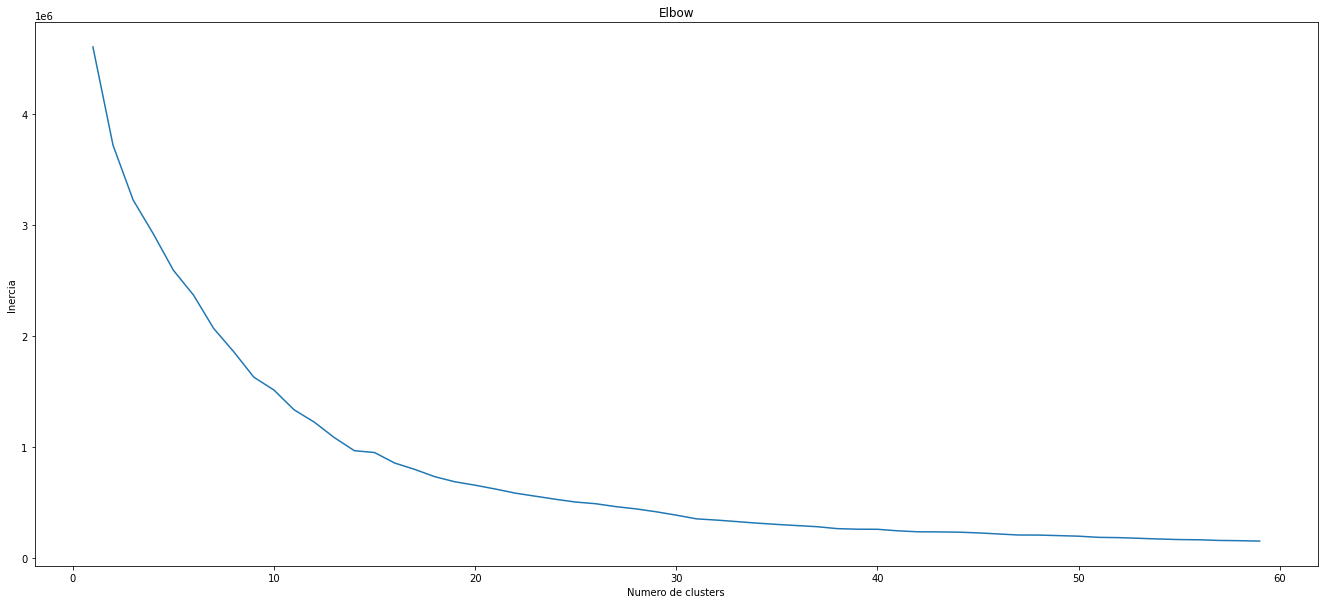

In [ ]:
inercias=[]
for i in range(1,60):
    kmeans=KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(df_complete_ponderado)
    inercias.append(kmeans.inertia_)
plt.figure(figsize=(23,10))
plt.plot(range(1, 60), inercias)
plt.title('Elbow')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia')
plt.show()

No lo veo muy convincente segun la metrica de silueta, podria mejorar esto aplicando reduccion de dimensionalidad. Esto no va a alterar el dataset, solamente voy a reducirlo a las 2 columnas que tengan mayor covarianza con respecto a las demas

In [ ]:
kmeans=KMeans(n_clusters=15,init='k-means++', random_state=42)
kmeans.fit(df_complete_ponderado)
silhouette_score(df_complete_ponderado, kmeans.labels_)

0.5072739020112407

**PCA (Analisis de componentes principales)**

In [ ]:
X = np.asarray(df_complete_ponderado)
X_PCA = PCA(2).fit_transform(X)

Voy a ejecutar de nuevo el experimento pero esta vez con el dataset reducido

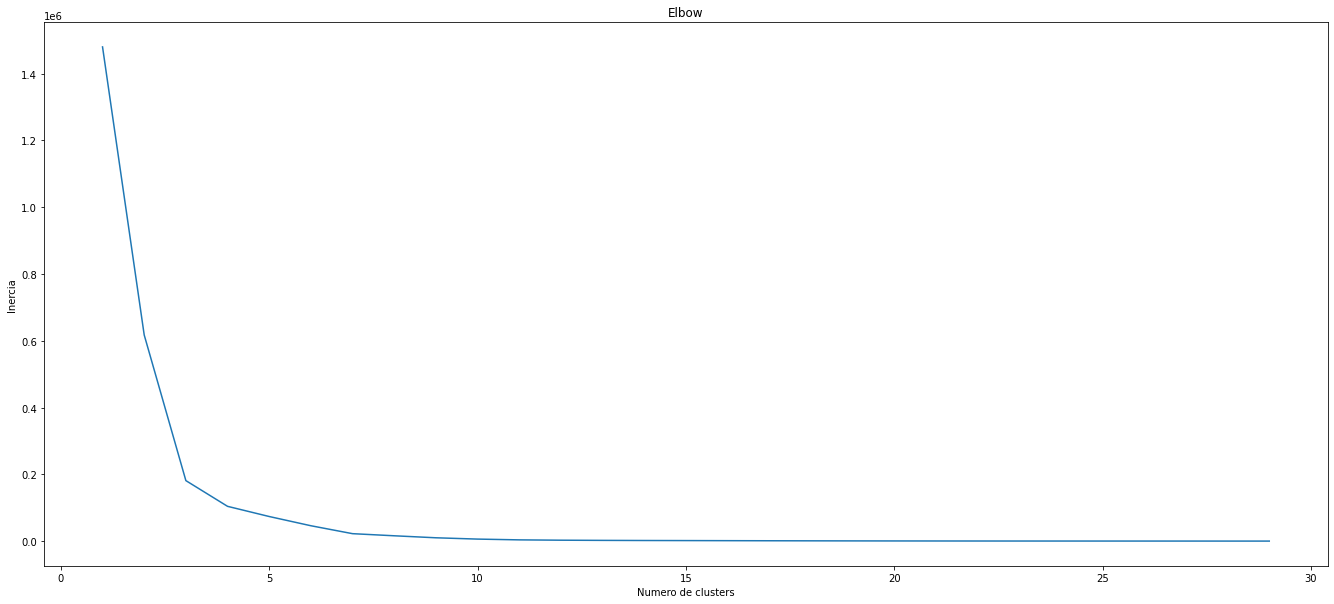

In [ ]:
inercias=[]
for i in range(1,30):
    kmeans=KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(X_PCA)
    inercias.append(kmeans.inertia_)
plt.figure(figsize=(23,10))
plt.plot(range(1,30), inercias)
plt.title('Elbow')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia')
plt.show()

La metrica mejoro significativamente y ahora el agrupamiento funciona bien

In [ ]:
kmeans=KMeans(n_clusters=10,init='k-means++', random_state=42)
kmeans.fit(X_PCA)
silhouette_score(X_PCA, kmeans.labels_)

0.8420253410297353

Por ultimo, voy a visualizar los contenidos graficando sus componentes principales en un plot de dispersion mapeados semanticamente con el N° de cluster

In [ ]:
df_contents_clustered = pd.DataFrame()
df_contents_clustered["content_id"] = df_complete.index.values
df_contents_clustered["pc1"] = X_PCA[:,0]
df_contents_clustered["pc2"] = X_PCA[:,1]
df_contents_clustered["cluster"] = kmeans.labels_
df_contents_clustered.head()

,content_id,pc1,pc2,cluster
0,0,-3.231720,-8.745510,0
1,1,38.989352,3.608974,4
2,2,9.397730,6.075642,6
3,3,-3.204835,-8.707660,0
4,4,-5.119670,-0.790269,3


In [ ]:
df_contents_clustered["cluster"].nunique()

10

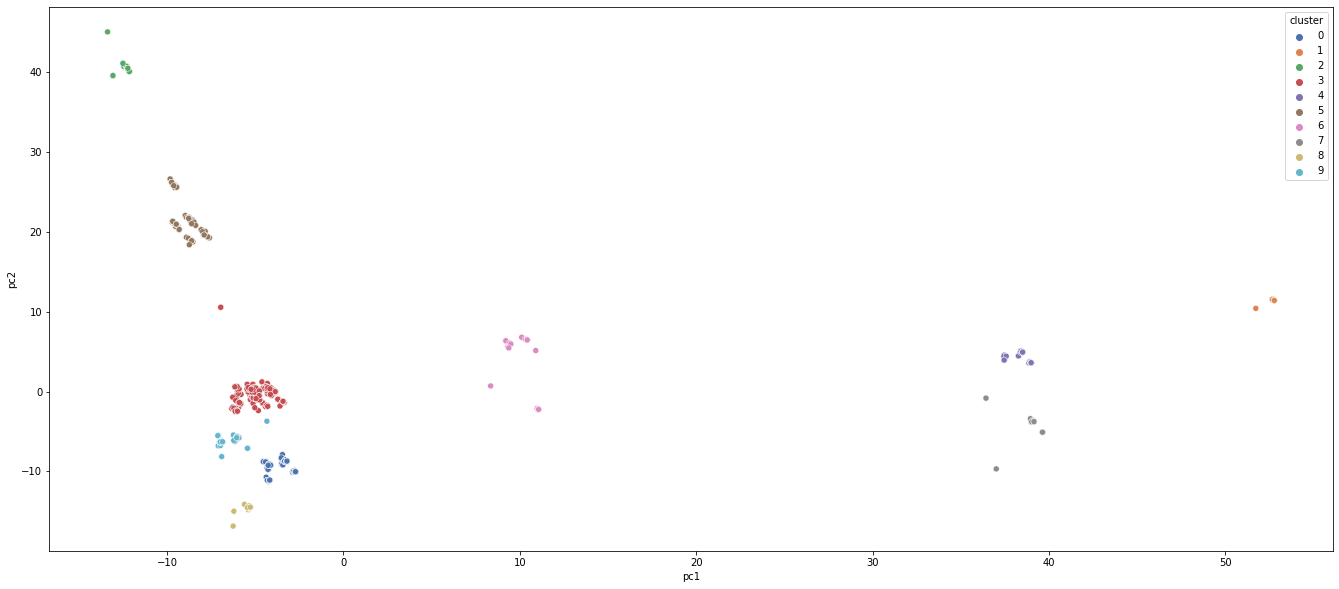

In [ ]:
plt.figure(figsize=(23,10))
sns.scatterplot(x='pc1', y='pc2',hue='cluster',data=df_contents_clustered, palette="deep")
plt.show()

**¿Cual es la utilidad de este agrupamiento?**

En vez de generar una matriz con dimension finita, podria asignarle una etiqueta de cluster a cada contenido, incluso se puede almacenar en la base de datos como una columna adicional.

Cada vez que se carga un nuevo contenido a la plataforma, deberia predecir el cluster que le corresponde y asignarselo en la base de datos.

De esta forma, cuando un usuario entra a la plataforma, el sistema puede consultar el historial del usuario y obtener los contenidos con mayor visualizacion (en teoria son los que mas le gustaron) y de esos contenidos encontrar los clusters derivados para realizar una consulta y recomndar contenidos similares.

Hay una desventaja con este metodo, y es que a pesar de recomendar contenidos similares no se sabe cuales son las medidas de similitud para ordenarlos de mayor a menor (aunque, se podria calcular nuevamente usando el filtro de cluster_id y los atributos), en este punto cabe preguntar.

* ¿Vale la pena sacrificar precision o tiempo de ejecucion para calcularla por un sistema mas agil, mantenible y robusto a los items nuevos?
* Suponiendo que podemos obtener los contenidos mas similares, ¿es prudente recomendar siempre los mismos contenidos o en el mismo orden?, el agrupamiento permite seleccionar n cantidad de contenidos similares ¿porque tiene que ser solo 20?

Queda a eleccion de un propietario de un sistema que ofrezca consumos a los clientes determinar cual es la mejor opcion


# **Insight 3: Recomendacion arbitraria**

Una buena estrategia de marketing es recomndar productos o items por notificaciones enviadas desde el sistema, el problema es como seleccionar a los usuarios y que contenidos recomendarles.

Este insight pretende resolver esa cuestion con una distribucion estadistica que filtra las opciones mas contundentes.

Primero necesito cargar los registros de interaccion usuario-contenido, luego calcular los minutos de visualizacion y reagrupar por account_id y asset_id (sumando los minutos por cada grupo).

In [ ]:
df_train = pd.read_csv(ruta_train)
columnas_necesarias = ["account_id","asset_id","tunein","tuneout"]
imputar_faltantes_por_moda(df_train, "device_type")

df_train['tunein_datetime'] = pd.to_datetime(df_train['tunein'], format='%Y-%m-%d %H:%M:%S')
df_train['tuneout_datetime'] = pd.to_datetime(df_train['tuneout'], format='%Y-%m-%d %H:%M:%S')
df_train['difftune_datetime'] = df_train['tuneout_datetime'] - df_train['tunein_datetime']

df_train['minutes'] = df_train['difftune_datetime'].apply(datetime_to_minutes)

df_train = df_train[["account_id","asset_id","minutes"]]

df_train = df_train.groupby(['account_id','asset_id'], as_index=False).agg({"minutes": "sum"})

df_train.head()

,account_id,asset_id,minutes
0,0,6397.0,48.0
1,0,13056.0,65.0
2,0,15900.0,128.0
3,0,29811.0,79.0
4,0,29897.0,16.0


Todos los assets tienen un tiempo de duracion grabados en el dataset de metadata, necesito asociarlos con el dataset de interacciones previamente cargado

In [ ]:
df_metadata = pd.read_csv(ruta_metadata, sep=';')
df_metadata = df_metadata[["asset_id","run_time_min"]]
df_metadata.head()

,asset_id,run_time_min
0,15188,48.0
1,24940,105.0
2,21939,82.0
3,9005,99.0
4,7391,126.0


In [ ]:
def consultar_duracion_total_asset(asset_id):
  mask = df_metadata["asset_id"] == asset_id
  df_ = df_metadata[mask].copy()
  return df_.iloc[0][1]

In [ ]:
consultar_duracion_total_asset(21939)

82.0

Listo, el dataset ya contiene los minutos visualizados y la duracion del asset

In [ ]:
df_train["run_time_min"] = df_train["asset_id"].apply(consultar_duracion_total_asset)
df_train.head()

,account_id,asset_id,minutes,run_time_min
0,0,6397.0,48.0,43.0
1,0,13056.0,65.0,86.0
2,0,15900.0,128.0,128.0
3,0,29811.0,79.0,79.0
4,0,29897.0,16.0,96.0


Voy a crear una columna adicional que es la diferencia entre la duracion del asset y los minutos visualizados

In [ ]:
df_train["rest_minutes_to_watch"] = df_train["run_time_min"] - df_train["minutes"]
df_train.head()

,account_id,asset_id,minutes,run_time_min,rest_minutes_to_watch
0,0,6397.0,48.0,43.0,-5.0
1,0,13056.0,65.0,86.0,21.0
2,0,15900.0,128.0,128.0,0.0
3,0,29811.0,79.0,79.0,0.0
4,0,29897.0,16.0,96.0,80.0


**Histograma de la nueva columna:**

Parecen haber algunos casos excepcionales, voy a filtrar un poco la distribucion

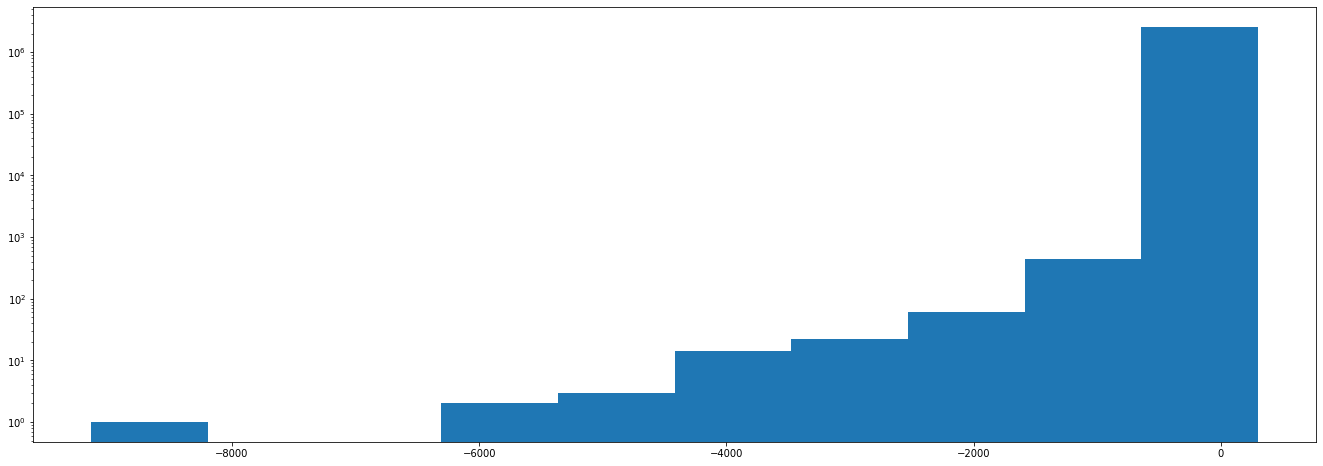

In [ ]:
plt.figure(figsize=(23,8))
plt.hist(df_train['rest_minutes_to_watch'],log=True)
plt.show()

La funcion de abajo divide una columna en 2 partes definidas por un umbral, y muestra el porcentaje que ocupa cada parte

In [ ]:
def dividir_col_por_umbral(df, col, umbral):
  count_1 = sum(df[col] < umbral)
  count_2 = sum(df[col] >= umbral)
  porcentaje_1 = count_1/df.shape[0]
  porcentaje_2 = count_2/df.shape[0]

  min = df[col].min()
  max = df[col].max()

  print("Division de "+col)
  print("")
  print(str(min)+" - "+str(umbral)+" => "+str(round(porcentaje_1,10))+" %")
  print("")
  print(str(umbral)+" - "+str(max)+" => "+str(round(porcentaje_2,10))+" %")
  print("")

Es conveniente filtrar los numeros menores a -1000

In [ ]:
dividir_col_por_umbral(df_train, 'rest_minutes_to_watch', -1000)

Division de rest_minutes_to_watch

-9138.0 - -1000 => 9.03564e-05 %

-1000 - 303.0 => 0.9999096436 %



**Distribucion definitiva y utilidad:**

Los rangos menores a 0 corresponden a las visualizaciones que duraron mas que la duracion del asset, esto significa que el usuario en particular tiende a repetir la visualizacion y conviene recomendarle contenidos similares utilizando el sistema de recomendacion.

El rango 0 corresponde a las visualizaciones completas de assets, queda a eleccion del encargado de marketing utilizar esa referencia para recomendar contenidos.

Los rangos mayores que 0 coresponden a visualizacioes que no llegaron hasta el final de la duracion del asset, pudo deberse a interrupciones que ocurrieron durante el contexto o simplemente el usuario no tiende a ver esa clase de contenido. No es prudente recomendar con esta referecia

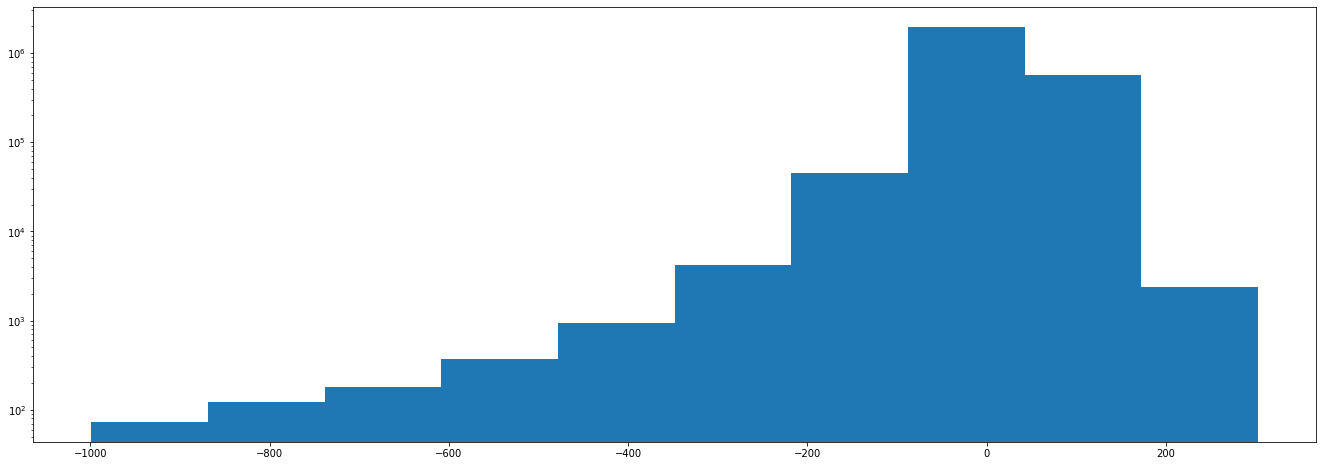

In [ ]:
plt.figure(figsize=(23,8))
mascara = df_train['rest_minutes_to_watch'] >= -1000
plt.hist(df_train.loc[mascara]['rest_minutes_to_watch'],log=True)
plt.show()